In [1]:
# sanity check after restart the kernel

print("abc")

abc


In [ ]:
# create the .kaggle directory and an empty kaggle.json file
# only need for running the first time

# !mkdir -p .kaggle
# !touch .kaggle/kaggle.json
# !chmod 600 .kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
#no need if credential is already in .kaggle/kaggle.json

# import json
# kaggle_username = "kanericaws"
# kaggle_key = "<kaggle_key>"

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
#only need for the first run
#!kaggle competitions download -c bike-sharing-demand


In [ ]:
# If you already downloaded it you can use the -o command to overwrite the file
#only need for the first run

#!unzip -o bike-sharing-demand.zip

In [ ]:
# load the dataset 
import pandas as pd
from autogluon.tabular import TabularPredictor

train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")


In [3]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

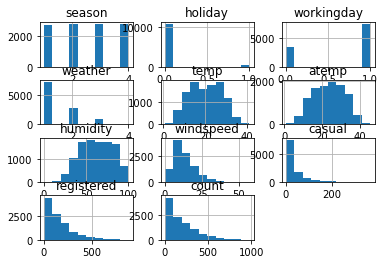

In [5]:
train.hist()

In [6]:
#create additional features

#convert str to datetime object
#format='%Y%m%d-%H%M%S'
#20210328-200000
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)

train['dt_obj'] =pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
test['dt_obj'] =pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')

# create new features
#df['Age Category'] = 'Over 30'
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
train['year'] = train['dt_obj'].dt.year
train['month'] = train['dt_obj'].dt.month
train['day'] = train['dt_obj'].dt.day
train['hour'] = train['dt_obj'].dt.hour
train['min'] = train['dt_obj'].dt.minute
train['second'] = train['dt_obj'].dt.second
train['dayofweek'] = train["dt_obj"].dt.dayofweek

test['year'] = test['dt_obj'].dt.year
test['month'] = test['dt_obj'].dt.month
test['day'] = test['dt_obj'].dt.day
test['hour'] = test['dt_obj'].dt.hour
test['min'] = test['dt_obj'].dt.minute
test['second'] = test['dt_obj'].dt.second
test['dayofweek'] = test["dt_obj"].dt.dayofweek

train['season']=0

#winter
train.loc[train['month'] == 1 , 'season'] = 1
train.loc[train['month'] == 2 , 'season'] = 1
train.loc[train['month'] == 12 , 'season'] = 1
#spring
train.loc[train['month'] == 3 , 'season'] = 2
train.loc[train['month'] == 4 , 'season'] = 2
train.loc[train['month'] == 5 , 'season'] = 2
#summer
train.loc[train['month'] == 6 , 'season'] = 3
train.loc[train['month'] == 7 , 'season'] = 3
train.loc[train['month'] == 8 , 'season'] = 3

#winter
train.loc[train['month'] == 9, 'season'] = 4
train.loc[train['month'] == 10 , 'season'] = 4
train.loc[train['month'] == 11 , 'season'] = 4

test['season']=0
#winter
test.loc[test['month'] == 1 , 'season'] = 1
test.loc[test['month'] == 2 , 'season'] = 1
test.loc[test['month'] == 12 , 'season'] = 1
#spring
test.loc[test['month'] == 3 , 'season'] = 2
test.loc[test['month'] == 4 , 'season'] = 2
test.loc[test['month'] == 5 , 'season'] = 2
#summer
test.loc[test['month'] == 6 , 'season'] = 3
test.loc[test['month'] == 7 , 'season'] = 3
test.loc[test['month'] == 8 , 'season'] = 3

#winter
test.loc[test['month'] == 9, 'season'] = 4
test.loc[test['month'] == 10 , 'season'] = 4
test.loc[test['month'] == 11 , 'season'] = 4

#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
train['hr_label']=0
#7-9
train.loc[train['hour'] == 7 , 'hr_label'] = 1
train.loc[train['hour'] == 8 , 'hr_label'] = 1
train.loc[train['hour'] == 9 , 'hr_label'] = 1
#11-13
train.loc[train['hour'] == 11 , 'hr_label'] = 2
train.loc[train['hour'] == 12, 'hr_label'] = 2
train.loc[train['hour'] == 13 , 'hr_label'] = 2
#17-18
train.loc[train['hour'] == 17 , 'hr_label'] = 3
train.loc[train['hour'] == 18 , 'hr_label'] = 3



#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
test['hr_label']=0
#7-9
test.loc[test['hour'] == 7 , 'hr_label'] = 1
test.loc[test['hour'] == 8 , 'hr_label'] = 1
test.loc[test['hour'] == 9 , 'hr_label'] = 1
#11-13
test.loc[test['hour'] == 11 , 'hr_label'] = 2
test.loc[test['hour'] == 12, 'hr_label'] = 2
test.loc[test['hour'] == 13 , 'hr_label'] = 2
#17-18
test.loc[test['hour'] == 17 , 'hr_label'] = 3
test.loc[test['hour'] == 18 , 'hr_label'] = 3

test['temp_label']=0
#cold
test.loc[test['temp'] <15  , 'temp_label'] = 1
#mild
test.loc[((test['temp'] >= 15) &( test['temp'] <= 26)), 'temp_label'] = 2
#hot
test.loc[test['temp'] > 26 , 'temp_label'] = 3

train['temp_label']=0
#cold
train.loc[train['temp'] <15  , 'temp_label'] = 1
#mild
train.loc[((train['temp'] >= 15) &( train['temp'] <= 26)), 'temp_label'] = 2
#hot
train.loc[train['temp'] > 26 , 'temp_label'] = 3


train['hum_label']=0
#not-hum
train.loc[train['humidity'] <55  , 'hum_label'] = 1
#hum
train.loc[(train['humidity'] >= 55), 'hum_label'] = 2


test['hum_label']=0
#not-hum
test.loc[test['humidity'] <55  , 'hum_label'] = 1
#hum
test.loc[(test['humidity'] >= 55), 'hum_label'] = 2

test['windspeed']=0
#not-windy
test.loc[test['windspeed'] <20  , 'wind_label'] = 1
#windy
test.loc[(test['windspeed'] >= 20), 'wind_label'] = 2

train['windspeed_label']=0
#not-windy
train.loc[train['windspeed'] <20  , 'wind_label'] = 1
#windy
train.loc[(train['windspeed'] >= 20), 'wind_label'] = 2





In [7]:
#sanity check
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,day,hour,min,second,dayofweek,hr_label,temp_label,hum_label,windspeed_label,wind_label
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.0,10886.0,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.000000
mean,2.505328,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,...,9.992559,11.541613,0.0,0.0,3.013963,0.627871,1.972625,1.621808,0.0,1.137332
std,1.116839,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,...,5.476608,6.915838,0.0,0.0,2.004585,0.993757,0.771557,0.484958,0.0,0.344214
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.0,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,...,5.000000,6.000000,0.0,0.0,1.000000,0.000000,1.000000,1.000000,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,...,10.000000,12.000000,0.0,0.0,3.000000,0.000000,2.000000,2.000000,0.0,1.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,...,15.000000,18.000000,0.0,0.0,5.000000,1.000000,3.000000,2.000000,0.0,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,...,19.000000,23.000000,0.0,0.0,6.000000,3.000000,3.000000,2.000000,0.0,2.000000


In [8]:
# Change weather column to a category 

train.loc[:, "hr_label"] = train["hr_label"].astype("category")
train.loc[:, "temp_label"] = train["temp_label"].astype("category")
train.loc[:, "hum_label"] = train["hum_label"].astype("category")
train.loc[:, "wind_label"] = train["wind_label"].astype("category")

test.loc[:, "hr_label"] = test["hr_label"].astype("category")
test.loc[:, "temp_label"] = test["temp_label"].astype("category")
test.loc[:, "hum_label"] = test["hum_label"].astype("category")
test.loc[:, "wind_label"] = test["wind_label"].astype("category")


In [ ]:
train.hist()

In [9]:
#sanity check
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         10886 non-null  object        
 1   season           10886 non-null  int64         
 2   holiday          10886 non-null  int64         
 3   workingday       10886 non-null  int64         
 4   weather          10886 non-null  int64         
 5   temp             10886 non-null  float64       
 6   atemp            10886 non-null  float64       
 7   humidity         10886 non-null  int64         
 8   windspeed        10886 non-null  float64       
 9   casual           10886 non-null  int64         
 10  registered       10886 non-null  int64         
 11  count            10886 non-null  int64         
 12  dt_obj           10886 non-null  datetime64[ns]
 13  year             10886 non-null  int64         
 14  month            10886 non-null  int64

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   object        
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   int64         
 9   dt_obj      6493 non-null   datetime64[ns]
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
 14  min         6493 non-null   int64         
 15  second      6493 non-null   int64         
 16  dayofweek   6493 non-nul

In [11]:
#train registered and casual riders seperately
train_c=train
train_c = train_c.drop('registered',axis=1)
train_c = train_c.drop('count',axis=1)

train_r=train
train_r = train_r.drop('casual',axis=1)
train_r = train_r.drop('count',axis=1)


In [12]:
train_r = train_r.drop('datetime',axis=1)
#train_r = train_r.drop('dt_obj',axis=1)

train_c = train_c.drop('datetime',axis=1)
#train_c = train_c.drop('dt_obj',axis=1)

test = test.drop('datetime',axis=1)
#test = test.drop('dt_obj',axis=1)



In [13]:
#sanity check
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           10886 non-null  int64         
 1   holiday          10886 non-null  int64         
 2   workingday       10886 non-null  int64         
 3   weather          10886 non-null  int64         
 4   temp             10886 non-null  float64       
 5   atemp            10886 non-null  float64       
 6   humidity         10886 non-null  int64         
 7   windspeed        10886 non-null  float64       
 8   casual           10886 non-null  int64         
 9   dt_obj           10886 non-null  datetime64[ns]
 10  year             10886 non-null  int64         
 11  month            10886 non-null  int64         
 12  day              10886 non-null  int64         
 13  hour             10886 non-null  int64         
 14  min              10886 non-null  int64

In [14]:
#sanity check
train_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           10886 non-null  int64         
 1   holiday          10886 non-null  int64         
 2   workingday       10886 non-null  int64         
 3   weather          10886 non-null  int64         
 4   temp             10886 non-null  float64       
 5   atemp            10886 non-null  float64       
 6   humidity         10886 non-null  int64         
 7   windspeed        10886 non-null  float64       
 8   registered       10886 non-null  int64         
 9   dt_obj           10886 non-null  datetime64[ns]
 10  year             10886 non-null  int64         
 11  month            10886 non-null  int64         
 12  day              10886 non-null  int64         
 13  hour             10886 non-null  int64         
 14  min              10886 non-null  int64

In [15]:
#sanity check
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      6493 non-null   int64         
 1   holiday     6493 non-null   int64         
 2   workingday  6493 non-null   int64         
 3   weather     6493 non-null   int64         
 4   temp        6493 non-null   float64       
 5   atemp       6493 non-null   float64       
 6   humidity    6493 non-null   int64         
 7   windspeed   6493 non-null   int64         
 8   dt_obj      6493 non-null   datetime64[ns]
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   int64         
 13  min         6493 non-null   int64         
 14  second      6493 non-null   int64         
 15  dayofweek   6493 non-null   int64         
 16  hr_label    6493 non-nul

In [ ]:
#https://auto.gluon.ai/dev/tutorials/tabular_prediction/tabular-indepth.html
predictor_r = TabularPredictor(label='registered', eval_metric='r2').fit(train_r,
    num_bag_folds=10, num_bag_sets=1, num_stack_levels=3,time_limit=300
    #hyperparameters = {'NN_TORCH': {'num_epochs': 20}, 'GBM': {'num_boost_round': 200}},  # last  argument is just for quick demo here, omit it in real applications
)

In [ ]:
#https://auto.gluon.ai/dev/tutorials/tabular_prediction/tabular-indepth.html
predictor_c = TabularPredictor(label='casual',problem_type="regression", eval_metric='r2').fit(train_c,
    num_bag_folds=10, num_bag_sets=1, num_stack_levels=3,time_limit=300
    #hyperparameters = {'NN_TORCH': {'num_epochs': 20}, 'GBM': {'num_boost_round': 200}},  # last  argument is just for quick demo here, omit it in real applications
)

In [16]:
predictor_c = TabularPredictor(label="casual",problem_type="regression",eval_metric="r2").fit(
    train_data=train_c, time_limit=180, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220901_091912\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "AutogluonModels/ag-20220901_091912\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 21
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4330.53 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.947303      13.944369   51.024180                0.000998           0.360874            2       True          7
1          LightGBM_BAG_L1   0.945655       1.564569   12.701617                1.564569          12.701617            1       True          4
2      WeightedEnsemble_L3   0.944242      16.035733  103.188187                0.000998           0.199466            3       True         11
3          LightGBM_BAG_L2   0.943056      15.032865   85.056131                0.114714           7.297039            2       True          9
4   RandomForestMSE_BAG_L2   0.942167      15.429546   87.372593                0.511395           9.613501            2       True         10
5        LightGBMXT_BAG_L2   0.940369      15.408627   86.078182                

<AxesSubplot:xlabel='model'>

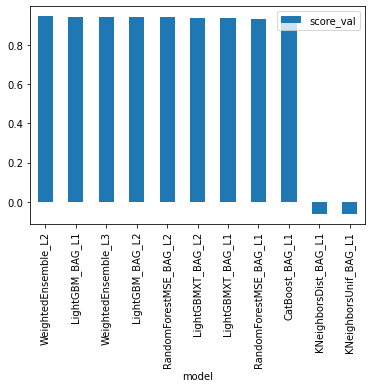

In [17]:
predictor_c.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [18]:
y_pred_c = predictor_c.predict(test)

In [19]:
predictor_r = TabularPredictor(label="registered",problem_type="regression",eval_metric="r2").fit(
    train_data=train_r, time_limit=180, presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20220901_093106\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "AutogluonModels/ag-20220901_093106\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 21
Label Column: registered
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4057.8 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.967716      19.943569   74.539193                0.000997           0.426620            2       True          6
1     WeightedEnsemble_L3   0.967338      22.288611  102.120391                0.000000           0.250361            3       True         10
2         LightGBM_BAG_L2   0.966748      20.959376   82.308816                0.190062           8.170316            2       True          8
3  RandomForestMSE_BAG_L2   0.966287      21.485874   84.727415                0.716560          10.588914            2       True          9
4         LightGBM_BAG_L1   0.965782       5.943798   28.557624                5.943798          28.557624            1       True          4
5       LightGBMXT_BAG_L2   0.964657      21.381989   83.110800                0.61267

<AxesSubplot:xlabel='model'>

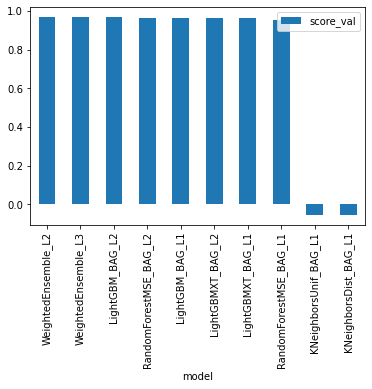

In [20]:
predictor_r.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_r.feature_metadata)

In [21]:
y_pred_r = predictor_r.predict(test)


In [22]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

test3 = pd.read_csv("test.csv")

result['datetime']=test3['datetime']

result[result['count'] < 0]

,count,datetime
52,-2,2011-01-22 04:00:00
53,-5,2011-01-22 06:00:00
54,-4,2011-01-22 07:00:00
75,-3,2011-01-23 05:00:00
76,-4,2011-01-23 06:00:00
...,...,...
5624,-4,2012-09-28 04:00:00
6090,-1,2012-11-26 02:00:00
6091,-2,2012-11-26 03:00:00
6115,-4,2012-11-27 03:00:00


In [23]:
result.loc[result['count'] < 0 , 'count'] = 0

submission=result

submission.to_csv("submission.csv", index=False)

import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "feature enginnering. 180 secs. Casual Regression. windspeed fix"

Successfully submitted to Bike Sharing Demand


  0%|          | 0.00/155k [00:00<?, ?B/s]
  5%|5         | 8.00k/155k [00:00<00:02, 52.1kB/s]
100%|##########| 155k/155k [00:01<00:00, 128kB/s]  


In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
import autogluon.core as ag
from sklearn.model_selection import train_test_split
# df_train_c, df_test_c = train_test_split(train_c, test_size=0.2, random_state=0)
# df_train_r, df_test_r = train_test_split(train_r, test_size=0.2, random_state=0)

# nn_options = {  # specifies non-default hyperparameter values for neural network models
#     'num_epochs': 10,  # number of training epochs (controls training time of NN models)
#     'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
#     'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
#     'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
# }



# hyperparameters = {  # hyperparameters of each model type
#                    'GBM': gbm_options,
#                    'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
#                   }  # When these keys are missing from hyperparameters dict, no models of that type are trained

# time_limit = 5*60  # train various models for ~2 min
# num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
# search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

# hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
#     'num_trials': num_trials,
#     'scheduler' : 'local',
#     'searcher': search_strategy,
# }

#do it as regression and see if there is an improvement --improve
#'num_boost_round': 400 


# predictor_c = TabularPredictor(label='casual', problem_type="regression").fit(
#     df_train_c, tuning_data=df_test_c, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )


#conclusion for casual only change is to set it to regression
# predictor_c = TabularPredictor(label="casual",problem_type="regression").fit(
#     time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

predictor_r = TabularPredictor(label='registered').fit(
    df_train_r, tuning_data=df_test_r, time_limit=time_limit,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)




In [ ]:
predictor_c = TabularPredictor(label="casual",problem_type="regression",eval_metric="r2").fit(
    train_data=train_c, time_limit=300, presets="best_quality"
)

In [ ]:
predictor_c.fit_summary()

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:

predictor_r = TabularPredictor(label="registered",problem_type="regression",eval_metric="r2").fit(
    train_data=train_r, time_limit=300, presets="best_quality"
)

In [ ]:
predictor_r.fit_summary()

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:
predictor_r.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:
y_pred_c = predictor_c.predict(test)

In [ ]:
y_pred_r = predictor_r.predict(test)

In [ ]:
# train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)


# predictor_c_p = TabularPredictor(label="casual").fit(
#     train_c_80, tuning_data=train_c_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

In [ ]:
# predictor_c_p.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c_p.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_c_p.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c_p.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_r.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_r.feature_metadata)

In [ ]:
# # # predict from specific model/stack
# # #i = 0  # index of model to use

# for i in range(0, 15):
#     model_to_use = predictor_c_p.get_model_names()[i]
# #y_pred_r = predictor_r.predict(test, model=model_to_use)
#     print(i);print(model_to_use);
#     #LightGBM\T2

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# i = 1  # index of model to use

# #for i in range(0, 15):
# model_to_use = predictor_c_p.get_model_names()[i]
# y_pred_c = predictor_c_p.predict(test, model=model_to_use)
# print(i);print(model_to_use);
# #LightGBM\T2


In [ ]:
# i = 10  # index of model to use

# for i in range(0, 11):
#     model_to_use = predictor_r.get_model_names()[i]
#     print(i);print(model_to_use);
# #y_pred_r = predictor_r.predict(test, model=model_to_use)


In [ ]:
# train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)

# predictor_c = TabularPredictor(label="casual",problem_type="regression").fit(
#     train_c_80, tuning_data=train_c_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )


In [ ]:
# predictor_c.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_c = TabularPredictor(label="casual").fit(
#     train_data=train_c, time_limit=180, presets="best_quality"
# )

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# #i = 1  # index of model to use

# for i in range(0, 15):
#     model_to_use = predictor_r.get_model_names()[i]
# #y_pred_c = predictor_c_p.predict(test, model=model_to_use)
#     print(i);print(model_to_use);
# #LightGBM\T2

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# i = 6  # index of model to use

# #for i in range(0, 15):
# model_to_use = predictor_r.get_model_names()[i]
# print(i);print(model_to_use);

# y_pred_r = predictor_r.predict(test, model=model_to_use)
# #LightGBM\T2

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
test.info()

In [ ]:
y_pred_r


In [ ]:
y_pred_r[y_pred_r<0]

In [ ]:
y_pred_c[y_pred_c<0]

In [ ]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

test3 = pd.read_csv("test.csv")

result['datetime']=test3['datetime']

result[result['count'] < 0]

In [ ]:
train_c.info()

In [ ]:






result.loc[result['count'] < 0 , 'count'] = 0

submission=result

submission.to_csv("submission.csv", index=False)

import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "drop datetime string. feature enginnering. use regression instead of classification in casual, num_bag_folds=10, num_bag_sets=1, num_stack_levels=3,time_limit=300, R2 metric"